# Read CCSM4 model data

In [13]:
import xarray as xr

path='D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/cesmi6gat31rblc200_ANN_210912_998911_cam2_decclimots.nc'

ds=xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:          (lev: 26, ilev: 27, time: 788, lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2114-12-16 00:00:00 ... 9984-12-16 00:00:00
  * lat              (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon              (lon) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Dimensions without coordinates: nbnd
Data variables: (12/142)
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    P0               float64 ...
    date             (time) int32 ...
    ...               ...
    VQ               (time, lev, lat, lon) float32 ...
    VT               (time, lev, lat, lon) float32 ...
    VU               (time, lev, lat, lon) float32 ...
    VV               (time, lev, lat, lon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
    time_bnds        (time, nbnd) object ...
Attributes: (12/18)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      cesmi6gat31rblc200
    title:                     UNSET
    logname:                   guido
    host:                      c9-13.local
    ...                        ...
    climo_command:             '/home/guido/anaconda3/bin/ncclimo -L 1 -c ces...
    climo_hostname:            c3-16
    climo_version:             4.7.4
    yrs_averaged:              2110-2119
    NCO:                       netCDF Operators version 4.8.0 (Homepage = htt...
    nco_openmp_thread_number:  1

# Extract ICEFRAC

In [14]:
import xarray as xr
import numpy as np

# Extracting the 'TREFHT' variable into a new DataArray
ds = ds['ICEFRAC']

# Creating a new dataset with just the 'TREFHT' variable
ds = ds.to_dataset()
# Get the length of the current 'time' dimension
num_times = ds.dims['time']

# Create a new time variable starting from 0, increasing in steps of 10
new_time = np.arange(0, num_times * 10, 10)

# Assign this new time variable to the 'time' coordinate of your dataset
ds['time'] = new_time

# rename the TREFHT to sat
ds = ds.rename({'ICEFRAC': 'sat'})
# rename the time to age
ds = ds.rename({'time': 'age'})



# ds.info
ds


<xarray.Dataset>
Dimensions:  (age: 788, lat: 48, lon: 96)
Coordinates:
  * age      (age) int32 0 10 20 30 40 50 60 ... 7820 7830 7840 7850 7860 7870
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    sat      (age, lat, lon) float32 ...

# Plot

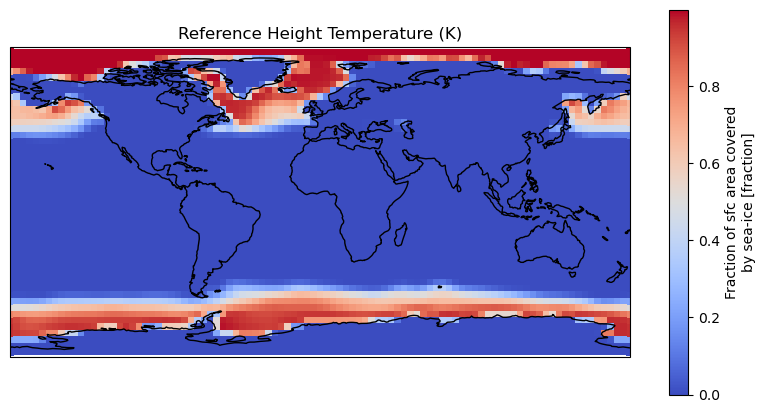

In [15]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



# Plotting the first value of time for TREFHT on a real world map
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ds.sat.isel(age=0).plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()
ax.set_global()
plt.title('Reference Height Temperature (K)')
plt.show()


# PCA

shape of the weight: (48,)
shape of the reshaped sat_centered_weighted: (788, 4608)


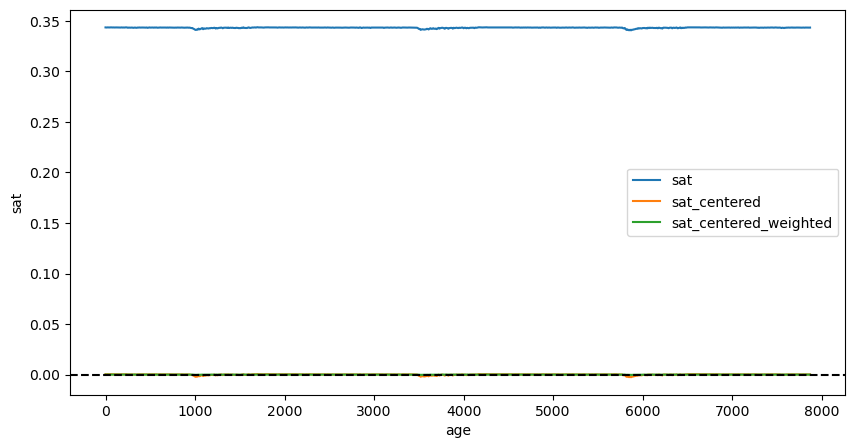

In [16]:
from toolbox import PCA_functions as pf

ds_sat=ds
# 1. Center the Data
ds_sat = pf.center_data(ds_sat)

# 2. Weight the Data
ds_sat = pf.apply_weighting(ds_sat)

# 3. Plot the Centered and Weighted Data
# Assuming you want to plot data for lat=0 and lon=0
lat_index = -2
lon_index = 90
pf.plot_sat_variables(ds_sat, lat_index, lon_index)

In [17]:
from toolbox import PCA_functions as pf
# 4. Perform PCA
exp_variance, eofs, pcs = pf.sat_PCA(ds_sat)
print('Explained variance:', exp_variance)


shape of the reshaped sat_centered_weighted: (4608, 788)
shape of u, s, vh: (4608, 4608) (788,) (788, 788)
shape of EOFs: (4608, 2)
shape of PCs: (788, 2)
Explained variance: [8.66955484e-01 5.57321223e-02 1.72882966e-02 9.48970937e-03
 8.11934474e-03 5.11494298e-03 3.50643989e-03 3.08523001e-03
 2.78201548e-03 2.31207767e-03 2.15240499e-03 1.73134302e-03
 1.70920326e-03 1.37832840e-03 1.16577412e-03 9.68090470e-04
 9.16444016e-04 8.17419033e-04 7.78350243e-04 7.51769419e-04
 6.10150732e-04 5.65199493e-04 5.42250067e-04 5.35976610e-04
 4.89299422e-04 4.22331726e-04 4.10078583e-04 3.85112535e-04
 3.58969193e-04 3.45322527e-04 3.13814533e-04 3.02478852e-04
 2.86092374e-04 2.76873775e-04 2.54724221e-04 2.44747771e-04
 2.34272661e-04 2.27273154e-04 2.07598591e-04 1.93743763e-04
 1.88416406e-04 1.84377950e-04 1.81321961e-04 1.75222939e-04
 1.66883231e-04 1.61119406e-04 1.51059628e-04 1.42543523e-04
 1.40585629e-04 1.36292405e-04 1.25735106e-04 1.23039704e-04
 1.19294831e-04 1.15427650e-04 1

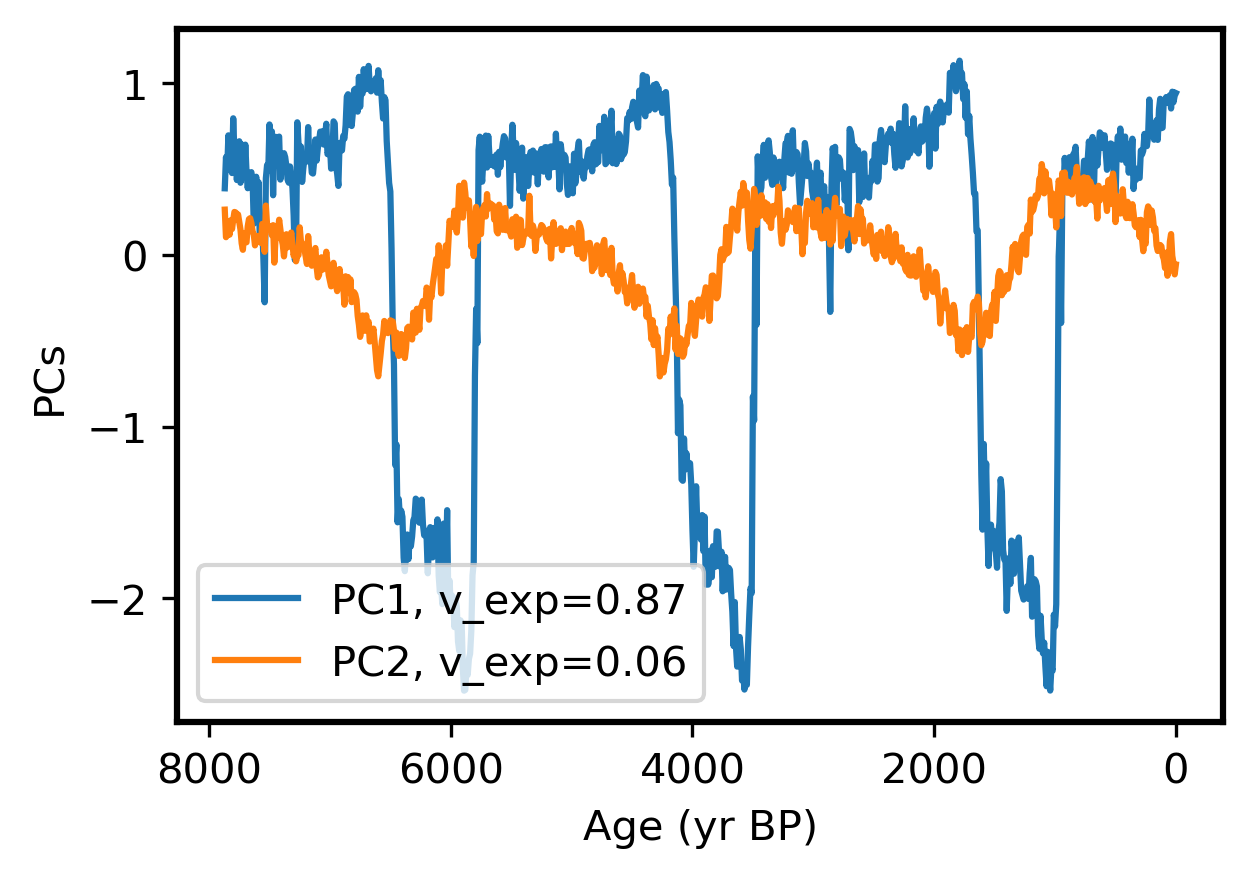

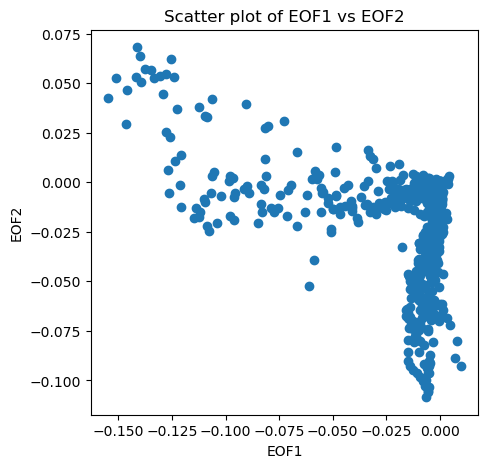

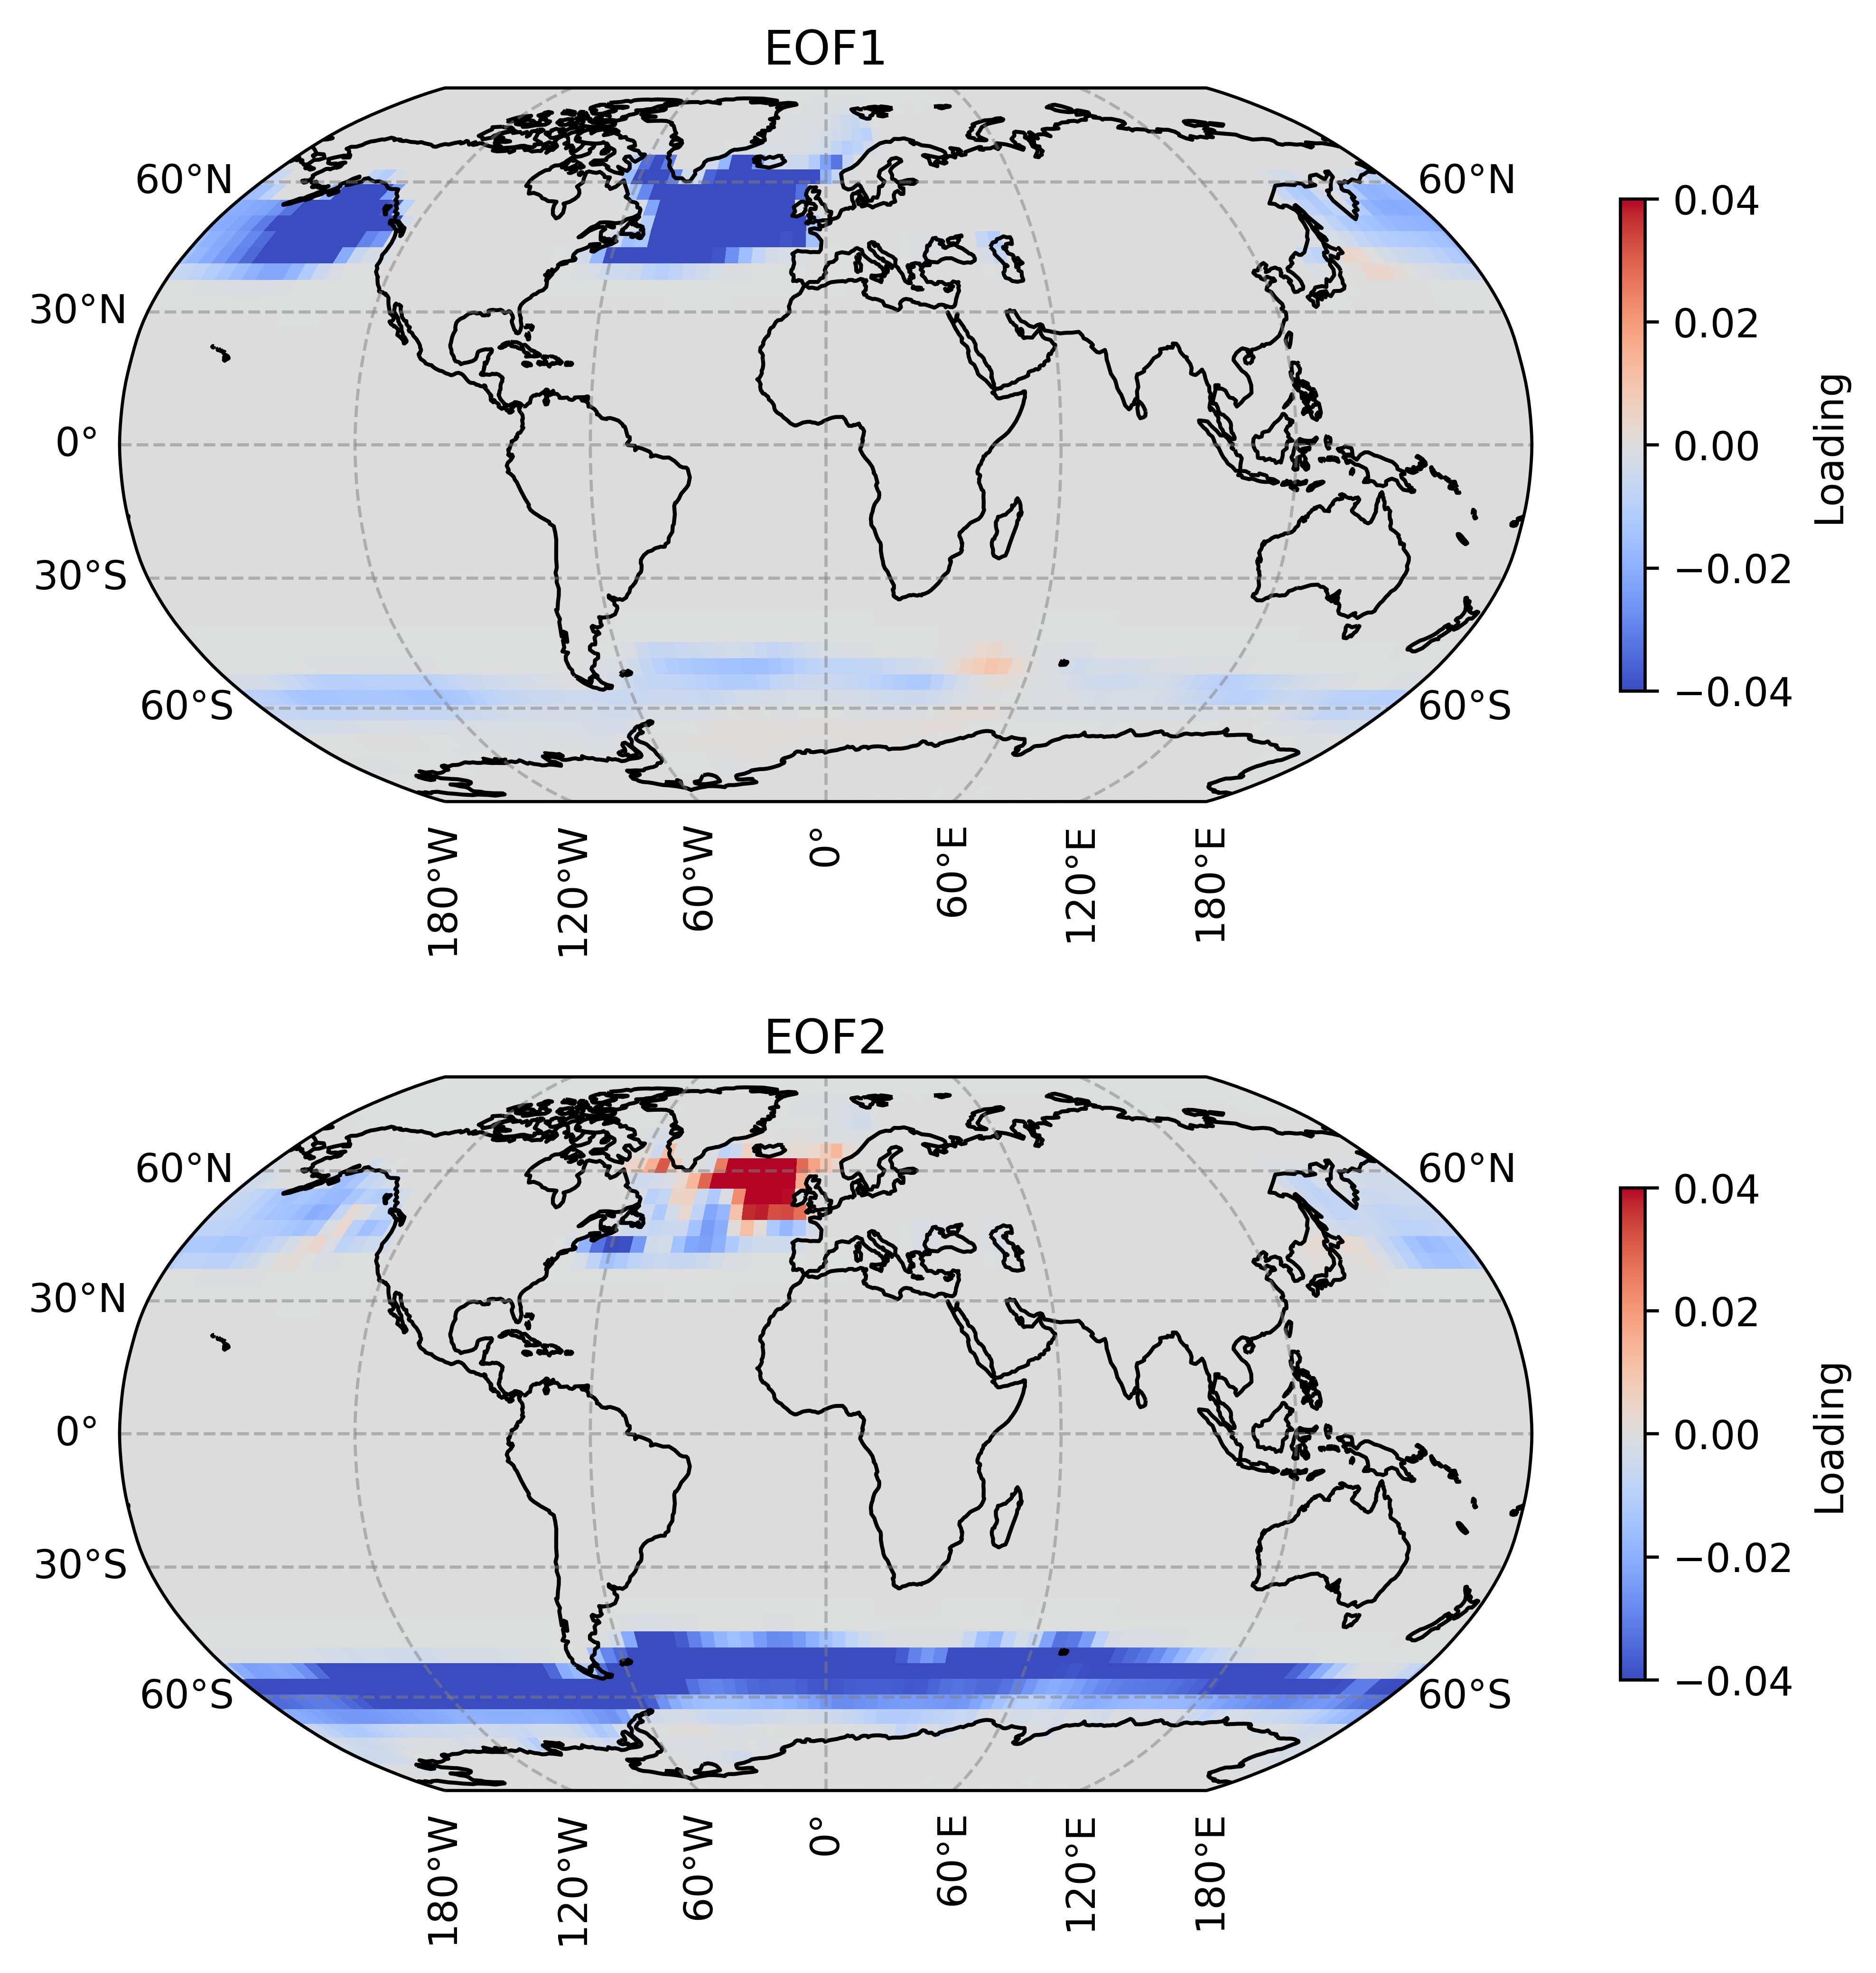

(<Figure size 4800x5400 with 4 Axes>,
 array([<GeoAxes: title={'center': 'EOF1'}>,
        <GeoAxes: title={'center': 'EOF2'}>], dtype=object))

In [18]:
# 5. Plot PCs
pf.plot_pcs(ds_sat['age'].values, pcs, exp_variance)

# 6. Plot EOF Scatter
pf.plot_eof_scatter(eofs)

# 7. Plot the EOF Map
pf.plot_eof_map(eofs, ds_sat['lat'].values, ds_sat['lon'].values)

# AIC

In [19]:
import xarray as xr
from sklearn.mixture import GaussianMixture
from toolbox import PCA_functions as pf

n_components_range = range(2, 9)  # 2 to 8 inclusive
aic_values = []

# Loop over the range of components
for n_components in n_components_range:
    # create a 2D GMM model
    gmm = GaussianMixture(n_components=n_components, covariance_type='full')

    gmm.fit(eofs)

    aic_values.append(gmm.aic(eofs))


d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(
d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluste

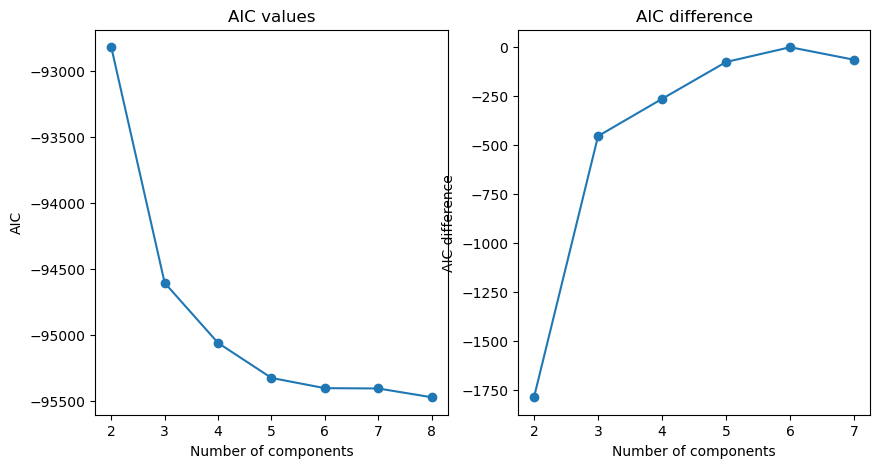

In [20]:
# plot the AIC values and delta AIC values (diff(AIC)) side by side 

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, marker='o')
plt.xlabel('Number of components')
plt.ylabel('AIC')
plt.title('AIC values')

plt.subplot(1, 2, 2)
plt.plot(n_components_range[:-1], np.diff(aic_values), marker='o')
plt.xlabel('Number of components')
plt.ylabel('AIC difference')
plt.title('AIC difference')
plt.show()

# GMM

d:\Users\User\anaconda3\envs\pz_venv_causal\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=18.
  warnings.warn(


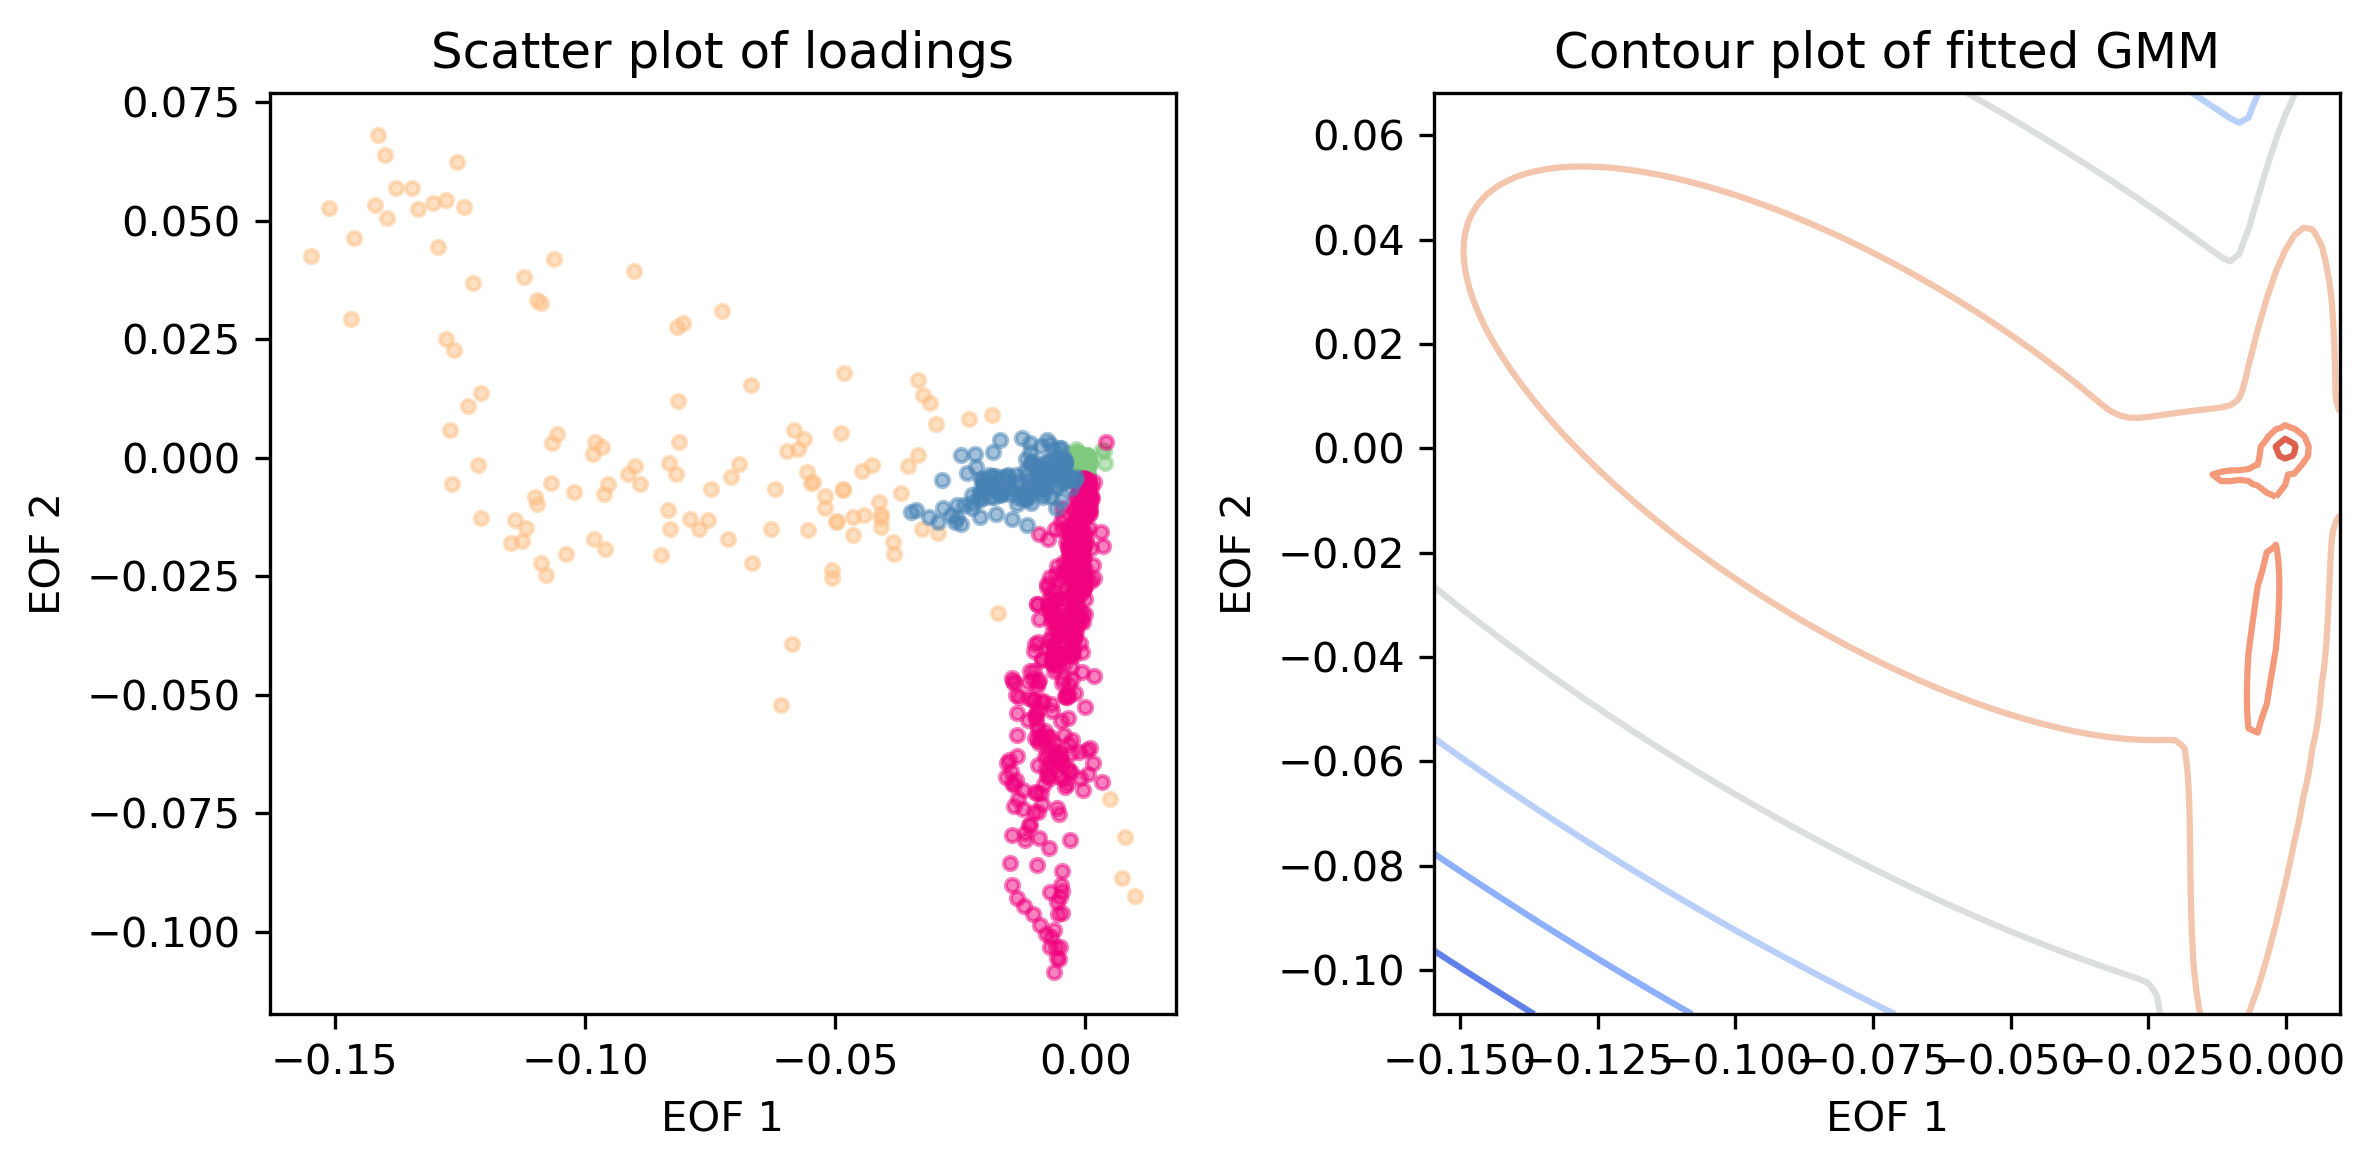

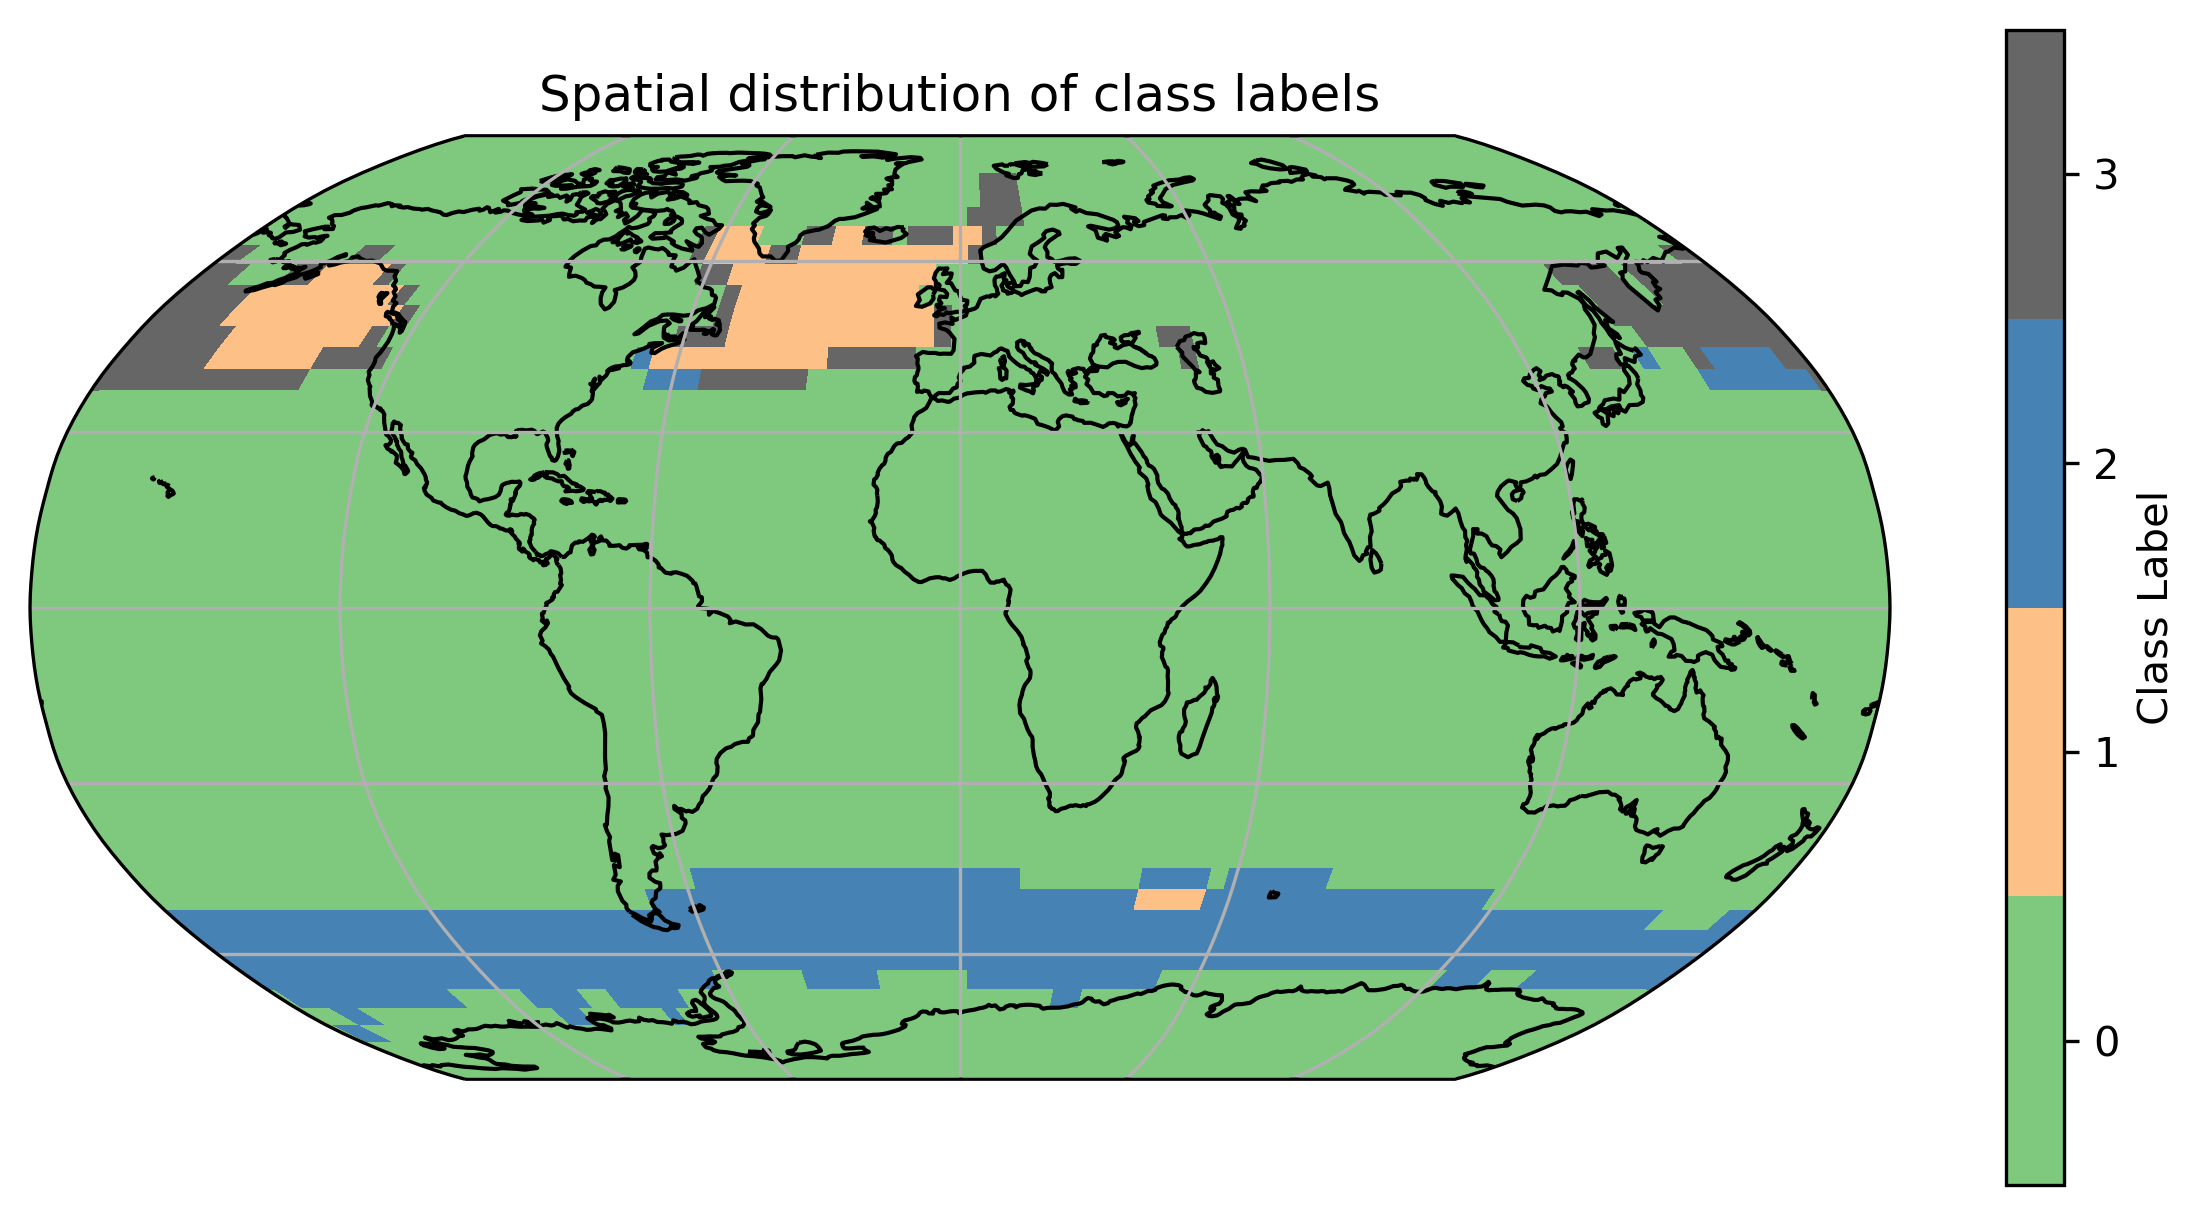

In [21]:
from toolbox import GMM_functions as gf
ds_EOFs_GMM,reshaped_probs=gf.GMM4EOFS(eofs, ds_sat,n_components=4)
gf.plot_labels(ds_EOFs_GMM)

In [29]:
ds_EOFs_GMM.to_netcdf('data/ds_sic_GMM.nc')

# Plot the weighted average of classes

In [25]:
from toolbox import GMM_functions as gf
import importlib
importlib.reload(gf) 

weighted_avg_sic=gf.plot_weighted_average_curve(ds_EOFs_GMM.copy(), dpi=900)

In [26]:
# save the weighted_avg undere data/ using pickle

import pickle

with open('data/weighted_avg_sic.pkl', 'wb') as f:
    pickle.dump(weighted_avg_sic, f)
    

In [27]:
# load the weighted_avg from data/
import pickle

with open('data/weighted_avg_sic.pkl', 'rb') as f:
    weighted_avg_sic = pickle.load(f)

# PCMCI

(<Figure size 640x480 with 4 Axes>,
 array([<Axes: ylabel='Class 0'>, <Axes: ylabel='Class 1'>,
        <Axes: ylabel='Class 2'>, <Axes: ylabel='Class 3'>], dtype=object))

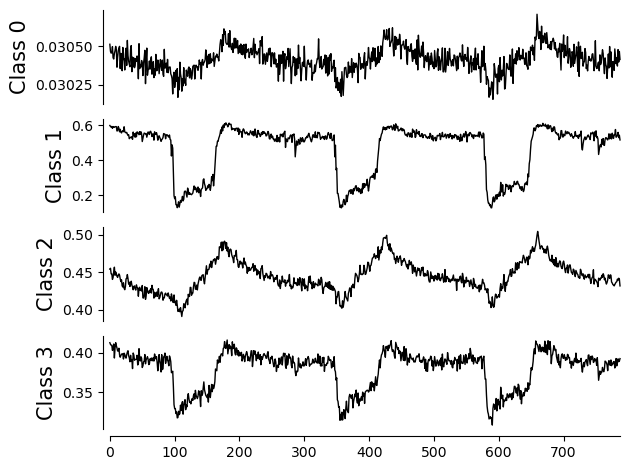

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import parcorr, gpdc, cmiknn

# Convert the dictionary to an array suitable for Tigramite's DataFrame
data_array = np.column_stack([weighted_avg_sic[key] for key in sorted(weighted_avg_sic.keys())])

# Create a Tigramite DataFrame object
var_names = [f"Class {k}" for k in sorted(weighted_avg_sic.keys())]
dataframe_TEMP = pp.DataFrame(data_array, datatime=np.arange(data_array.shape[0]), var_names=var_names)
tp.plot_timeseries(dataframe_TEMP,label_fontsize=15,tick_label_size=10)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 2
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable Class 0 has 5 link(s):
    [pc_alpha = 0.2]
        (Class 2 -1): max_pval = 0.00004, |min_val| =  0.147
        (Class 3 -1): max_pval = 0.01000, |min_val| =  0.092
        (Class 2 -2): max_pval = 0.01260, |min_val| =  0.089
        (Class 3 -2): max_pval = 0.09539, |min_val| =  0.060
        (Class 1 -2): max_pval = 0.10461, |min_val| =  0.058

    Variable Class 1 has 4 link(s):
    [pc_alpha = 0.4]
        (Class 1 -1): max_pval = 0.00000, |min_val| =  0.630
        (Class 1 -2): max_pval = 0.00001, |min_val| =  0.160
        (Class 3 -1): max_pval = 0.20778, |min_val| =  0.045
        (Class 2 -1): max_pval = 0.33959, |min_val| =  0.034

    Variable Class 2 has 4 link(s):
    [pc_alpha = 0.1]
        (Class 2 -1

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

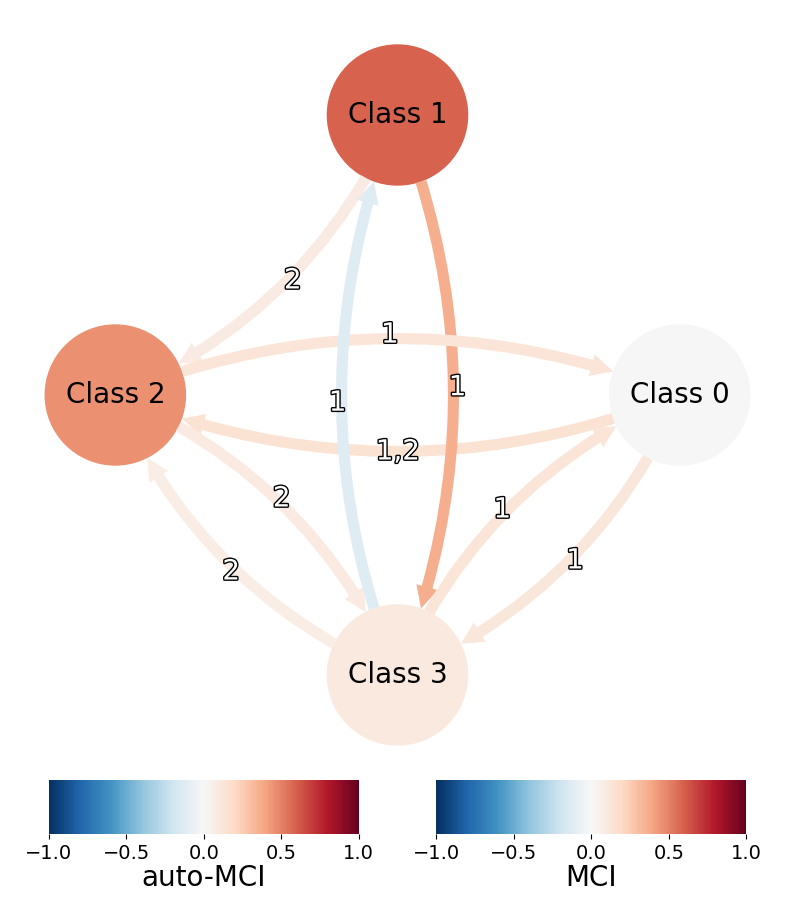

In [24]:
ParCorr = parcorr.ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe_TEMP,
    cond_ind_test=ParCorr,
    verbosity=1)

pcmci.verbosity = 1
tau_max=2
results = pcmci.run_pcmci(tau_min=1, tau_max=tau_max, pc_alpha=None)
# q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=tau_max, fdr_method='fdr_bh')

# create a figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
tp.plot_graph(
    fig_ax=(fig, ax),
    graph = results['graph'],
    val_matrix=results['val_matrix'],
    var_names=var_names,
    link_colorbar_label='MCI',
    node_colorbar_label='auto-MCI',
    link_label_fontsize=20,
    label_fontsize=20,
    tick_label_size=14,
    node_label_size=20,
    edge_ticks=0.5,
    node_ticks=0.5,
    node_size=0.5
    )